<a href="https://colab.research.google.com/github/yashpatil454/Global_Terrorism_EDA_I/blob/main/Global_Terrorism_Analysis_Capstone_Project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
gt_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA Capstone I/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##Data Pre-Processing
###Raw data is often unorecognized and contains a lot of information which is irrelevant to the project requirements. Data preprocessing methodology helps in converting this raw data into a more    meaningful, focused, interpretable and readable format. 

In [5]:
#Rename and extract useful columns for better understanding before getting in dataframe.
gt_df.rename(columns ={'iyear':'Year', 'imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_name','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','propvalue':'Damages','propextent_txt':'Damage_txt'}, inplace = True)

In [6]:
#Keep Relevant columns only
gt_df = gt_df[['Year','Month','Day','Country','Region','latitude','longitude','Attack','Target','Killed','Wounded','Summary','Group_name','Target_type','Weapon_type','Motive','Damages','Damage_txt']]

In [7]:
#This column shows us total no.of casualties in a particular attack
gt_df['Casualties'] = gt_df['Killed'] + gt_df['Wounded']

In [8]:
#Dropping datapoints/rows which have null values in latitude and longitude column for further visualisation.
gt_df.dropna(subset=['latitude','longitude'], inplace=True)

In [9]:
#Replacing -99 value for Damages column to drop rows for better visualisation.
gt_df['Damages'].replace([-99.0, np.nan], 0.0, inplace=True)
gt_df['Damage_txt'].replace('Unknown', np.nan, inplace=True)

In [10]:
gt_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
latitude            0
longitude           0
Attack              0
Target            598
Killed           9779
Wounded         15668
Summary         62521
Group_name          0
Target_type         0
Weapon_type         0
Motive         127101
Damages             0
Damage_txt     133682
Casualties      16218
dtype: int64

In [11]:
gt_df.head(10)

,Year,Month,Day,Country,Region,latitude,longitude,Attack,Target,Killed,Wounded,Summary,Group_name,Target_type,Weapon_type,Motive,Damages,Damage_txt,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,0.0,NaN,1.0
1,1970,0,0,Mexico,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,15.478598,120.599741,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN,0.0,NaN,1.0
3,1970,1,0,Greece,Western Europe,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0,NaN,NaN
4,1970,1,0,Japan,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0,NaN,NaN
5,1970,1,1,United States,North America,37.005105,-89.176269,Armed Assault,Cairo Police Headquarters,0.0,0.0,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0,Minor (likely < $1 million),0.0
6,1970,1,2,Uruguay,South America,-34.891151,-56.187214,Assassination,Juan Maria de Lucah/Chief of Directorate of in...,0.0,0.0,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0.0,NaN,0.0
7,1970,1,2,United States,North America,37.791927,-122.225906,Bombing/Explosion,Edes Substation,0.0,0.0,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,22500.0,Minor (likely < $1 million),0.0
8,1970,1,2,United States,North America,43.076592,-89.412488,Facility/Infrastructure Attack,"R.O.T.C. offices at University of Wisconsin, M...",0.0,0.0,"1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,60000.0,Minor (likely < $1 million),0.0
9,1970,1,3,United States,North America,43.072950,-89.386694,Facility/Infrastructure Attack,Selective Service Headquarters in Madison Wisc...,0.0,0.0,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,0.0,Minor (likely < $1 million),0.0


In [12]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177134 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         177134 non-null  int64  
 1   Month        177134 non-null  int64  
 2   Day          177134 non-null  int64  
 3   Country      177134 non-null  object 
 4   Region       177134 non-null  object 
 5   latitude     177134 non-null  float64
 6   longitude    177134 non-null  float64
 7   Attack       177134 non-null  object 
 8   Target       176536 non-null  object 
 9   Killed       167355 non-null  float64
 10  Wounded      161466 non-null  float64
 11  Summary      114613 non-null  object 
 12  Group_name   177134 non-null  object 
 13  Target_type  177134 non-null  object 
 14  Weapon_type  177134 non-null  object 
 15  Motive       50033 non-null   object 
 16  Damages      177134 non-null  float64
 17  Damage_txt   43452 non-null   object 
 18  Casualties   160916 non-

In [13]:
#.T is used here to transpose the describe matrix.
gt_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,177134.0,2002.913150,1.321093e+01,1.970000e+03,1991.000000,2009.000000,2014.000000,2.017000e+03
Month,177134.0,6.468668,3.388221e+00,0.000000e+00,4.000000,6.000000,9.000000,1.200000e+01
Day,177134.0,15.517975,8.808546e+00,0.000000e+00,8.000000,15.000000,23.000000,3.100000e+01
latitude,177134.0,23.498444,1.856925e+01,-5.315461e+01,11.510545,31.467463,34.685087,7.463355e+01
longitude,177134.0,-458.695653,2.047790e+05,-8.618590e+07,4.545640,43.246506,68.710327,1.793667e+02
Killed,167355.0,2.361591,1.147994e+01,0.000000e+00,0.000000,0.000000,2.000000,1.570000e+03
Wounded,161466.0,3.195242,3.635737e+01,0.000000e+00,0.000000,0.000000,2.000000,8.191000e+03
Damages,177134.0,45366.104682,7.283569e+06,0.000000e+00,0.000000,0.000000,0.000000,2.700000e+09
Casualties,160916.0,5.285770,4.249621e+01,0.000000e+00,0.000000,1.000000,4.000000,9.574000e+03


#Plotting a pie chart on Target type attacked by terrorists all over the world.

In [14]:
#Isolating the Target_type column into a df
val_df = gt_df['Target_type'].value_counts().reset_index()

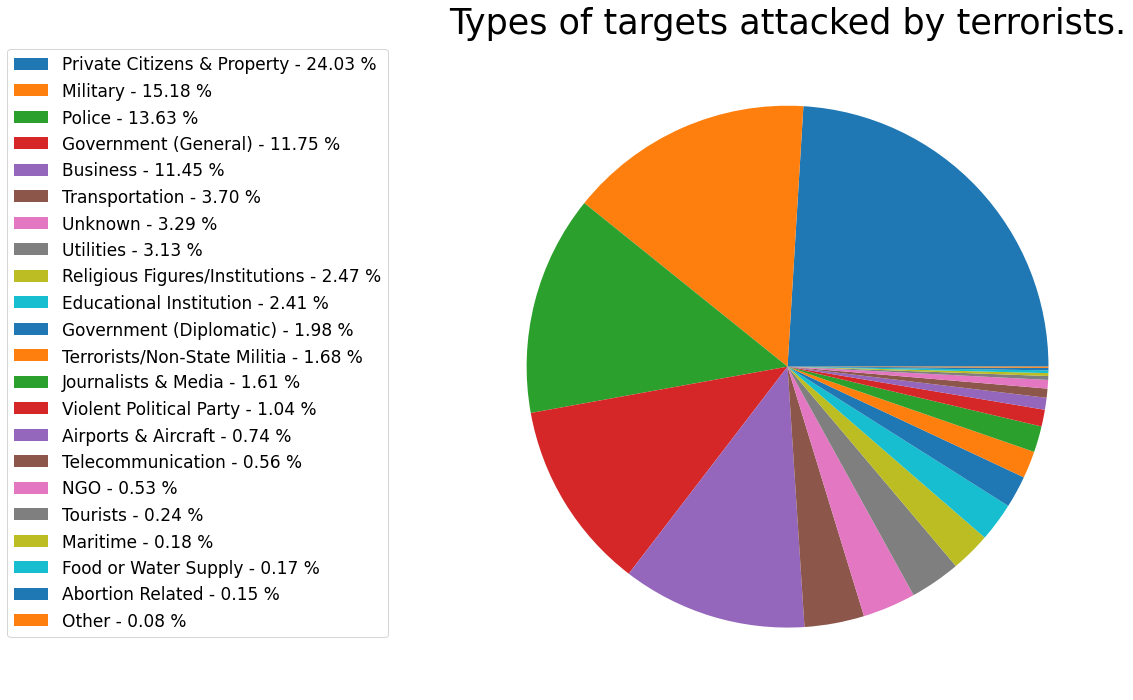

In [15]:
#Plotting piechart over the Target_type df
plt.figure(figsize=(15,12))
data = val_df['Target_type']
label = val_df['index']
percent = 100.*data/data.sum()
plt.pie(data)
plt.title("Types of targets attacked by terrorists.",fontsize = 35)

#Making customized legend by editing labels
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label, percent)]
plt.legend(labels, bbox_to_anchor=(-0.1,1), fontsize=17)
plt.show()

#Inference: 
By plotting the target type attacked by terrorists on a pie chart we can visualize on what facilities or on which organizations terrorists execute their attacks.

# Plotting areas on worldmap to better visualize areas prone to frequent terrorist attacks!!!

In [16]:
#Creating a location co-ordinates df
loc_df = gt_df[['latitude','longitude','Country']].value_counts()[:500].reset_index()
loc_df.rename(columns = {0:'Attack_count'}, inplace = True)

In [17]:
#Plotting scatter plot on world map with the help of plotly express
fig = px.scatter_geo(loc_df,lat='latitude',lon='longitude', hover_name='Country', color = 'Country')
fig.update_layout(title = 'Terrorist Attacks on World Map', title_x=0.4,height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#Inference: 
Plotting the attack cooridinates on worldmap we can figure out by densely populated marker, which country is highly prone to terrorist attacks!
We can see that countries like Pakistan, Afghanistan, Colombia, Somalia, Iraq and etc.
have high number of Terrorist Attacks.

#Visualizing Top 3 Regions and Target_type affected during the years.

In [18]:
#Making a list of top 3 Regions and Target_type
region_li = list(gt_df['Region'].value_counts()[:3].reset_index()['index'])
print(region_li)
target_type_li = list(gt_df['Target_type'].value_counts()[:3].reset_index()['index'])
print(target_type_li)

['Middle East & North Africa', 'South Asia', 'South America']
['Private Citizens & Property', 'Military', 'Police']


In [19]:
#Data-Processing to get the desired data
def processing():
  li = []
  for i in range(1,4):
    for j in range(1,4):
      res = gt_df.loc[(gt_df['Region'] == region_li[i-1]) & (gt_df['Target_type'] == target_type_li[j-1])]['Year'].value_counts().reset_index()
      res.rename(columns = {'index':'year','Year':'count'}, inplace = True)
      res.sort_values(by='year',inplace=True)
      x = res['year'].tolist()
      y = res['count'].tolist()
      r = region_li[i-1]
      t = target_type_li[j-1]
      li.append([x,y,r,t])
  return li

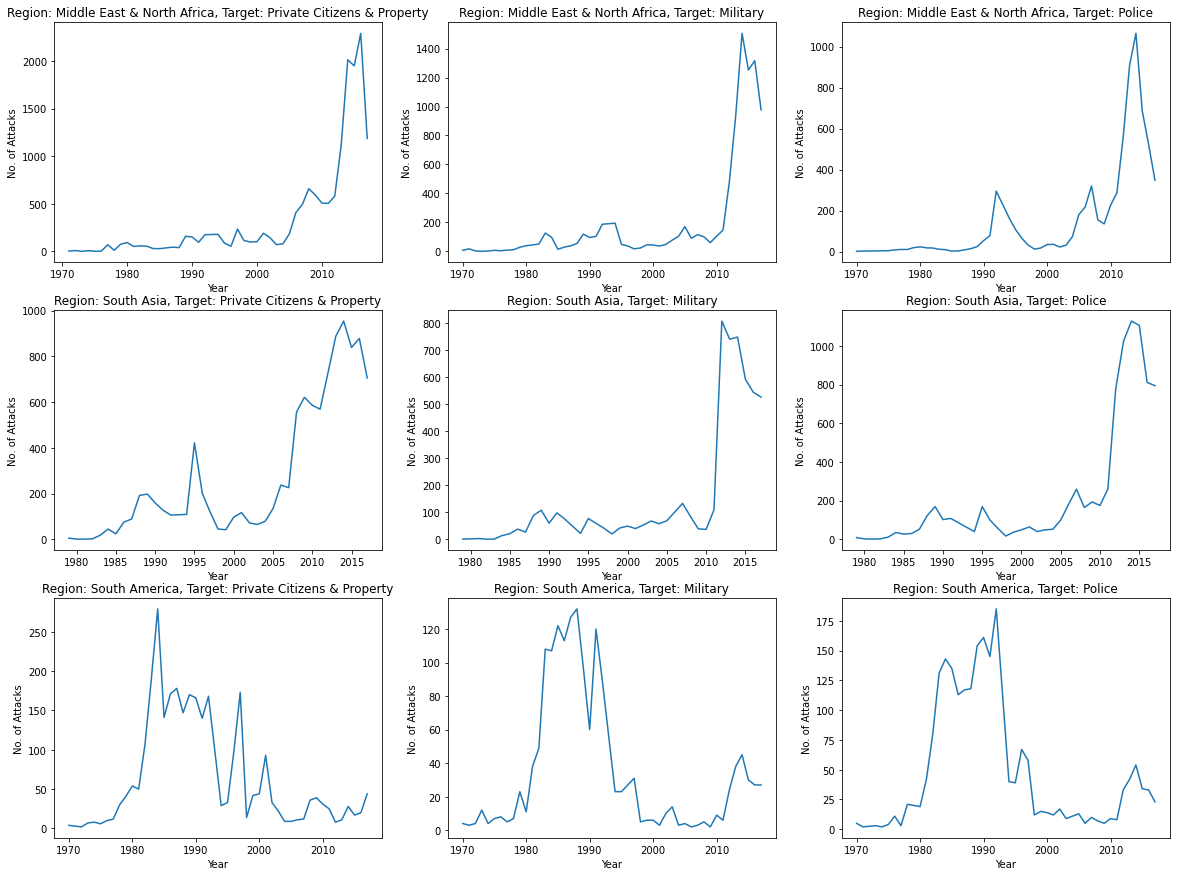

In [20]:
#Plotting the processed data into subplot
plt.figure(figsize=(20,15))
li = processing()

for i in range(9):
  x = li[i][0]
  y = li[i][1]
  plt.subplot(3, 3, i+1)
  plt.plot(x, y)
  plt.title("Region: {0}, Target: {1}".format(li[i][2],li[i][3]))
  plt.xlabel('Year')
  plt.ylabel('No. of Attacks')

#Inference: 
By Visualizing top targets attacked by terrorists with top regions affected we can figure out the trend of the attacks conducted by terrorists over the years.

#Visualising known damages suffered by top 10 countries by terrorist attacks.

In [21]:
#Data-Processing to get the desired data for visualization
dam_df = gt_df[['Country','Damages']]
dam_df = dam_df.groupby('Country').sum().sort_values(by='Damages', ascending=False).reset_index()[:10]

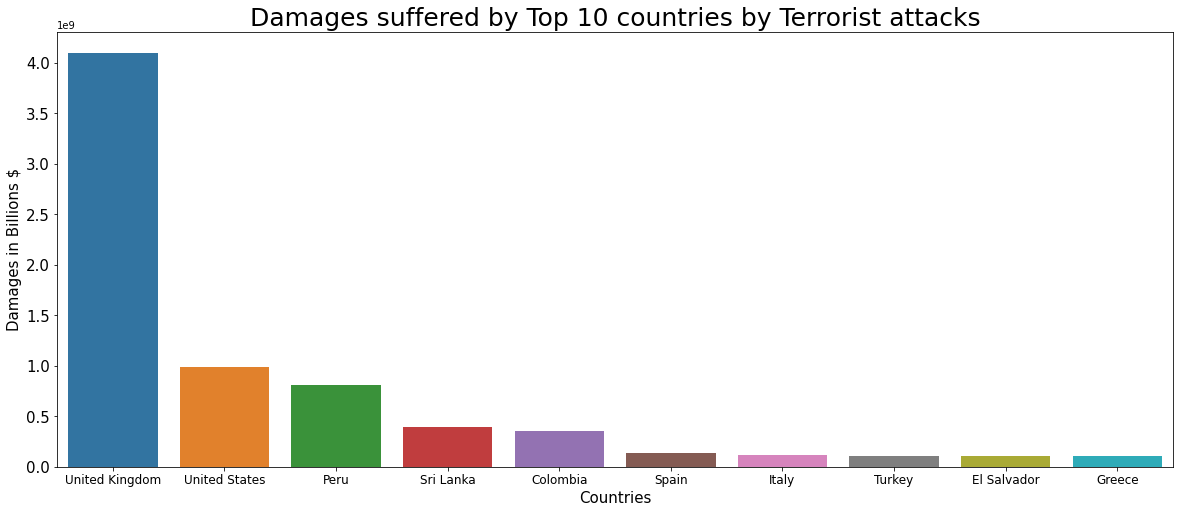

In [22]:
#Plotting the processed data into barplot and giving appropriate title and co-ordinate labels
plt.figure(figsize=(20,8))
sns.barplot(data = dam_df, x = 'Country', y = 'Damages')
plt.xticks(fontsize = 12)
plt.yticks(fontsize=15)
plt.title('Damages suffered by Top 10 countries by Terrorist attacks',fontsize = 25)
plt.xlabel('Countries',fontsize = 15)
plt.ylabel('Damages in Billions $',fontsize = 15)
plt.show()

#Inference: 
By this barplot we can visualize which Country has incurred most amount of damage in terms of dollars.

#Visualising what types of weapons caused how many number of Casualties during 1970 to 2017.

In [23]:
#Filtering and isolating the required data into a separate data into another df for better visualization
cas_df = gt_df[['Weapon_type','Casualties']].dropna()
cas_df = cas_df.groupby('Weapon_type').sum().sort_values(by='Casualties', ascending=False).reset_index()
cas_df.drop(cas_df.index[cas_df['Weapon_type'] == 'Unknown'], inplace = True)

In [24]:
#Plotting the processed data into a treemap
figx = px.treemap(cas_df, path=['Weapon_type'], values='Casualties',title='Casualties by different types of weapons.')
figx.show()

#Inference: 
By this treemap we can visualize casualties by different types of weapons used by terrorists while attacks.